# Classification using k Nearest Neighbours

## Exercises

### Exercise 1 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier


For these exercises you will use the penguins dataset from seaborn. 

First, remove any rows with missing values and then create a numerical code for classification rather than using the string value of `species`.

Create a feature array which consists of the flipper length and bill depth, a target (i.e., Y or outcome) series which consists of the species code and a vector which contains the species names. 

Plot a scatter plot of the feature array against the target series. (3 marks)

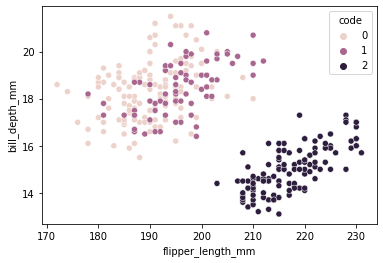

In [2]:
peng = sns.load_dataset('penguins').dropna()

peng['code'] = peng.species.astype('category').cat.codes

Y= peng['code']

X = peng.loc[:,['flipper_length_mm', 'bill_depth_mm']]

cat = peng.species.unique()

sns.scatterplot(x=X['flipper_length_mm'], y=X['bill_depth_mm'], hue=Y,); 


### Exercise 2 

Split the data into testing and training sets, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Fit the training data to this model. Then calculate the predictions of this model for the test features. (3 marks)

In [3]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

n_neighbours = 10

clf = KNeighborsClassifier(n_neighbours, weights='uniform')
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test) #predictions for test



### Exercise 3

Calculate and plot the confusion matrix and calculate accuracy for this model. Use the following function to plot the confusion matrix (2 marks)

In [4]:
def plt_confusion_matrix(cnf_matrix, cats, method):
    """
    Given actual target values and predicted values for a classifier 'method', 
    plots the confusion matrix
    """
    # write the confusion matrix to a dataframe with row and column names as the categories
    cmatrix = pd.DataFrame(cnf_matrix,columns=cats,index=cats) 
    f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
    sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
    plt.title('Confusion matrix for '+method) # add a title, + concatenates two strings
    plt.ylabel('Actual label') # add a ylabel
    plt.xlabel('Predicted label') # add a xlabel
    # adjust the bottom and top of the figure, so we can view all of it
    bottom, top = ax.get_ylim()  # get the y axis limits
    ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

Accuracy: 0.866


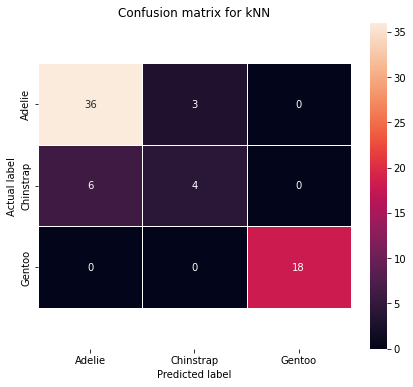

In [5]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
plt_confusion_matrix(cnf_matrix, cat, 'kNN')
print("Accuracy:",np.round(accuracy_score(Y_test, Y_pred),3)) # calculate and print the accuracy score

### Exercise 4

Repeat the calculations in Exercise 2 and 3, but first normalize the feature array. (2 marks)

In [6]:
Xn = X/X.std()

X_train,X_test,Y_train,Y_test=train_test_split(Xn,Y,train_size=0.8,random_state=0)

n_neighbours = 10

clf = KNeighborsClassifier(n_neighbours, weights='uniform')
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

Accuracy: 0.866


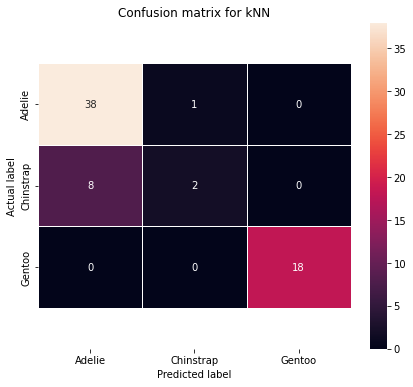

In [7]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
plt_confusion_matrix(cnf_matrix, cat, 'kNN')
print("Accuracy:",np.round(accuracy_score(Y_test, Y_pred),3)) # calculate and print the accuracy score